# Extrapolation Period Sensitivity

In [1]:
import chainladder as cl

This example demonstrates the ``extrap_periods`` functionality of the `TailCurve`
estimator.  The estimator defaults to extrapolating out 100 periods.  However,
we can see that the "Inverse Power" curve fit doesn't converge to its asymptotic
value.


In [2]:
tri = cl.load_sample('clrd').groupby('LOB').sum().loc['medmal', 'CumPaidLoss']

# Create a fuction to grab the scalar tail value.
def scoring(model):
    """ Scoring functions must return a scalar """
    return model.tail_.iloc[0, 0]

# Create a grid of scenarios
param_grid = dict(
    extrap_periods=list(range(1, 100, 6)),
    curve=['inverse_power', 'exponential'])

# Fit Grid
model = cl.GridSearch(cl.TailCurve(), param_grid=param_grid, scoring=scoring).fit(tri)

# Plot results
results = model.results_.pivot(columns='curve', index='extrap_periods', values='score')

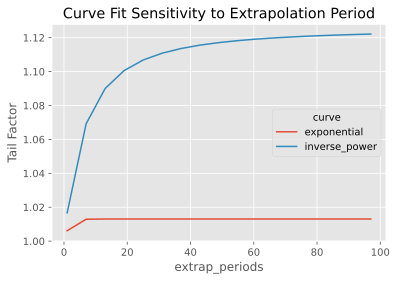

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

ax = results.plot(
    ylim=(1,None), ylabel='Tail Factor',
    title='Curve Fit Sensitivity to Extrapolation Period');

In [ ]:
from myst_nb import glue
glue("plot_extrap_period", ax.get_figure(), display=False)